In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
data = pd.read_csv("Topic_Survey_Assignment.csv")


In [3]:
data.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [4]:
data.set_index('Unnamed: 0', inplace=True)


In [5]:
data.head(10)

,Very interested,Somewhat interested,Not interested
Unnamed: 0,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [6]:
data = data.rename_axis(index=(None))
data.head(10)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


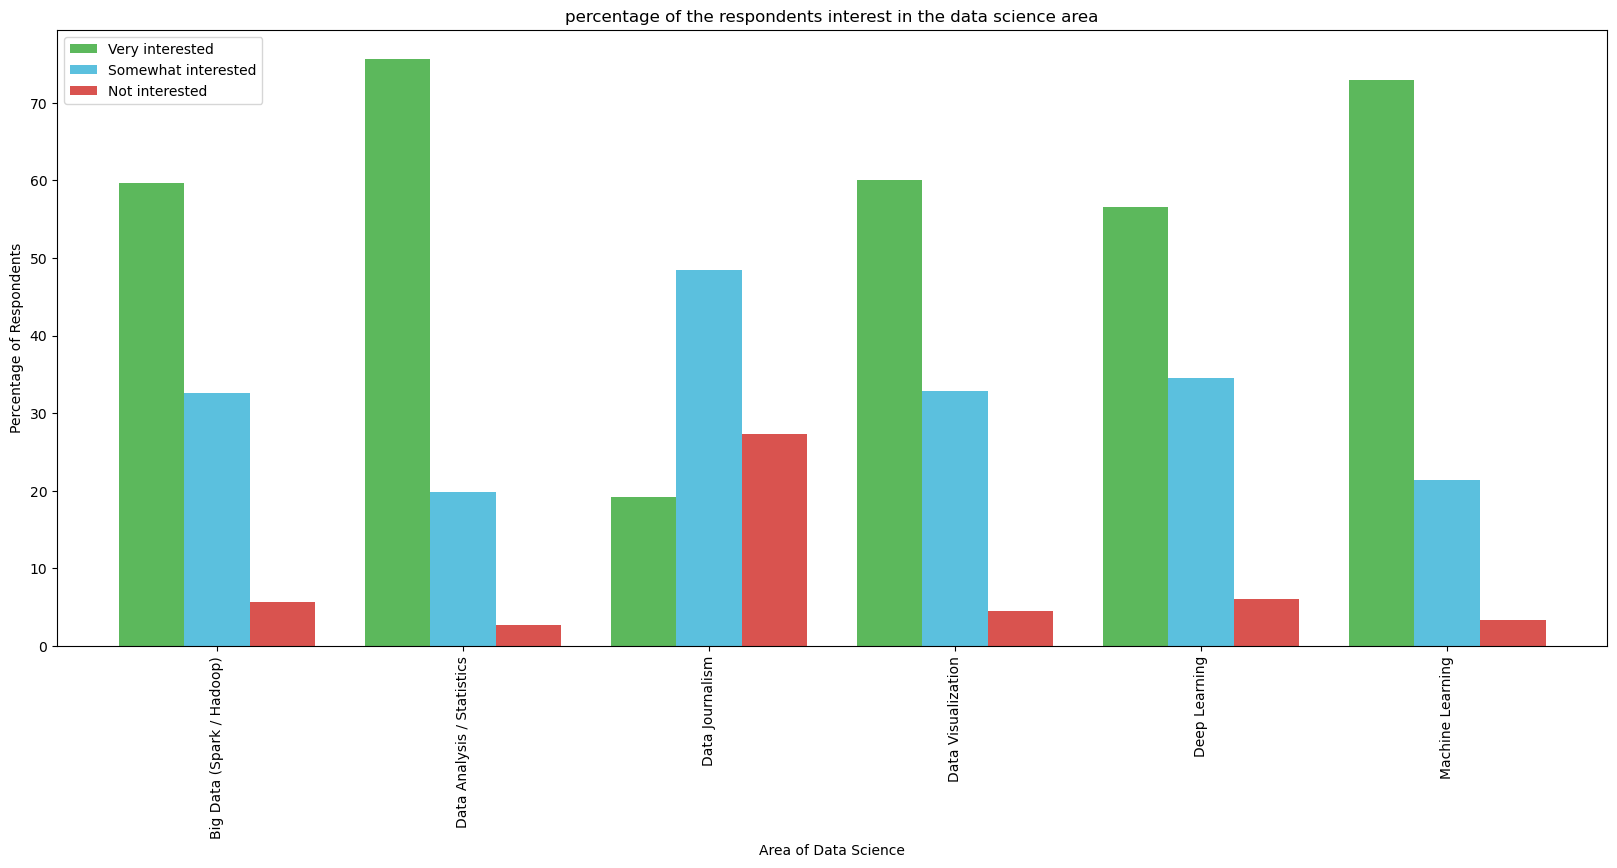

In [7]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

data_per = (100. * data / 2233).round(2)
# step 2: plot data
data_per.plot(kind='bar', figsize=(20, 8),  width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

plt.xlabel('Area of Data Science') 
plt.ylabel('Percentage of Respondents') 
plt.title('percentage of the respondents interest in the data science area') # add title to the plot

plt.show()

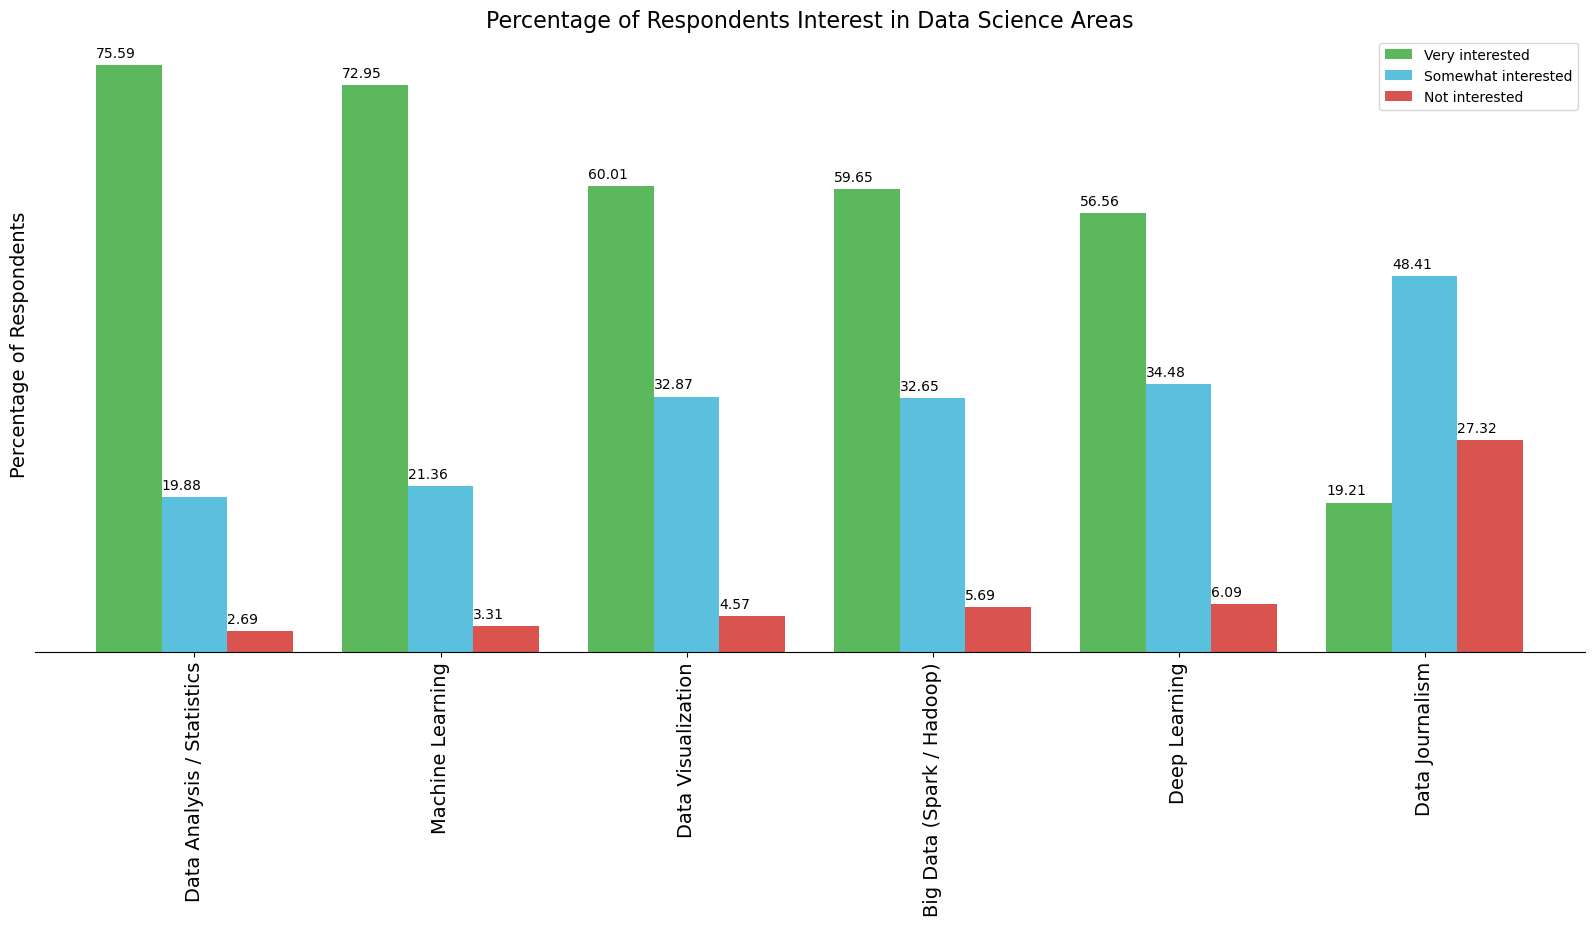

In [8]:
colors = ['#5cb85c','#5bc0de','#d9534f']
df_VInt = data.sort_values(by='Very interested', ascending=False)
 
#Convert the numbers into percentages of the total number of respondents
perc = (df_VInt /2233) *100 
perc = round (perc, 2)

ax = perc.plot(kind='bar', figsize=(20,8), width=0.8, color=colors, )

plt.ylabel('Percentage of Respondents', fontsize=14)
plt.title('Percentage of Respondents Interest in Data Science Areas', fontsize=16)
plt.xticks(fontsize=14)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.yticks([])

ax.spines['bottom'].set_visible(True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y=p.get_xy()
    ax.annotate('{:.2f}'. format(height), (x, y + height + 1))
    

    
plt.show()

In [9]:
data = pd.read_csv("Police_Department_Incidents_-_Previous_Year__2016_.csv")


In [10]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
print(data.shape)

(150500, 13)


In [12]:
crime = pd.DataFrame(data.PdDistrict.value_counts().reset_index().values, columns=["Neighbourhood", "Count"])
crime = crime.sort_index(axis = 0, ascending=True)
crime

,Neighbourhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [23]:
import folium
world_geo = 'san-francisco.geojson' # geojson file
# create a plain world map
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42
world_map = folium.Map(location=[latitude, longitude], zoom_start=12)
world_map

In [24]:
crime['Count'] = crime.Count.astype(int)


In [25]:
crime.dtypes


Neighbourhood    object
Count             int64
dtype: object

In [28]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

folium.Choropleth(
    geo_data=world_geo,
    data=crime,
    columns=['Neighbourhood', 'Count'],
    fill_opacity=0.3,
    line_weight=2,
).add_to(world_map)

# display map
world_map

In [31]:
# definition of the boundaries in the map
district_geo = r'san-francisco.geojson'
  
# calculating total number of incidents per district
SF_COORDINATES = (37.76, -122.45)

  
# creation of the choropleth
map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)
folium.GeoJson(district_geo).add_to(map1)
               
display(map1)